## Table of Contents

1. [About Project Euler](#About-Project-Euler)
2. [Disclaimer](#Disclaimer)
3. [Problem 66](#Problem-66)
4. [Required Modules](#Required-Modules)
5. [Main Solution](#Main-Solution)
6. [Big O Notation](#Big-O-Notation)

## About Project Euler <a name="About-Project-Euler"></a>


"Project Euler exists to encourage, challenge, and develop the skills and enjoyment of anyone with an interest in the fascinating world of mathematics."

For more info about the project please check [the official website](https://projecteuler.net/about).




## Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the Project Euler problem stated in the [Project Euler website](https://projecteuler.net). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of Project Euler, and all rights are reserved by them.

Please refrain from copying or reproducing this solution directly for any purpose that violates the copyright of Project Euler. Instead, use it as a reference or learning resource to enhance your problem-solving skills.

## Problem 66 <a name="Problem-66"></a>

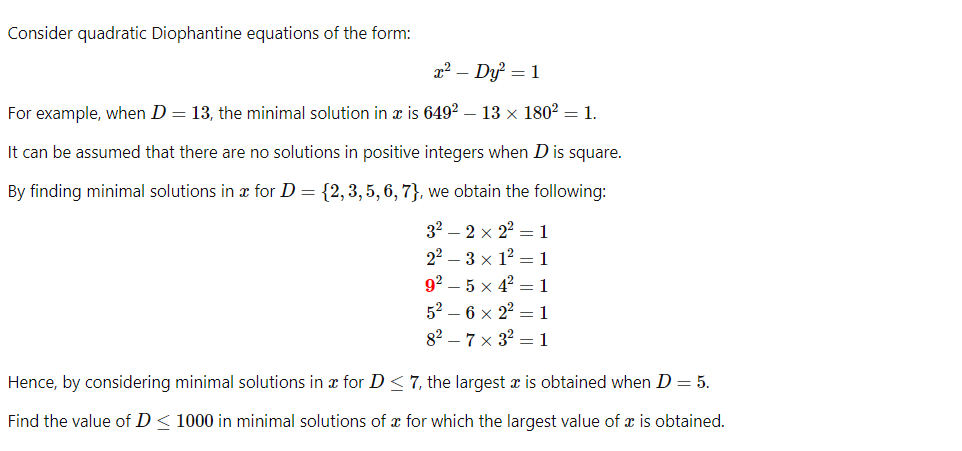

<br>
$**Hint**$

This one I think is the hardest between first 100 problems. You should do some research about [pell's equation](https://en.wikipedia.org/wiki/Pell%27s_equation).

## Required Modules <a name="Required-Modules"></a>

In [ ]:
import time   #Capturing the execution time

## Main Solution <a name="Main-Solution"></a>



In [ ]:
start_time = time.time()

maxD = 1000
# Continued fraction generator for square roots
def continued_fraction(n):
    x, y = 1, int(n**0.5)
    q, lastq = 1, 2 * y
    while q != lastq:
        q = int(x*(n** 0.5 + y)/(n - y**2))
        yield q
        x, y = (n - y**2)//x, q*(n - y**2)//x - y

# List of numbers that are not perfect squares
D = [i for i in range(2, maxD + 1) if int(i ** 0.5 + 0.5) ** 2 != i]

# Dictionary to store solutions for x values
answers = {}

# Iterate over numbers that are not perfect squares
for d in D:
    # Generate the sequence values for the continued fraction of d
    seqvals = [val for val in continued_fraction(d)]

    # Insert the integer square root of d at the beginning of the sequence
    seqvals.insert(0, int(d ** 0.5))

    # Adjust the sequence length based on even or odd number of terms
    if (len(seqvals) - 2) & 1:
        seqvals.pop(-1)
    else:
        seqvals.extend(seqvals[1:-1])

    den, num = 1, seqvals[-1]  # Initialize denominator and numerator
    # Compute the final numerator and denominator using the continued fraction terms
    for i in range(len(seqvals) - 2, -1, -1):
        num, den = seqvals[i] * num + den, num  # GCD always 1

    # Store the solution (num = x, den = y) in the dictionary
    answers[num] = d

answer = answers[max(answers.keys())]

end_time = time.time()
execution_time = end_time - start_time

print("Final Answer:",answer,"\nExecution time:","{:.4f}".format(execution_time), "seconds")

Final Answer: 661 
Execution time: 0.0289 seconds


## Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

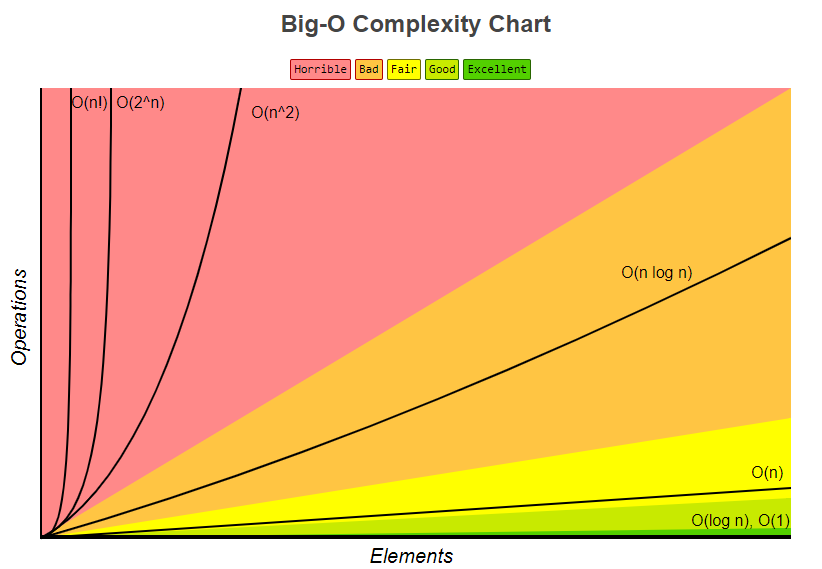

The time and space complexity of my code can be analyzed as follows:

Time Complexity:
1. Generating Continued Fraction: The `continued_fraction` generator function generates the continued fraction terms for a given number `n`. The number of iterations is determined by the convergence of the continued fraction, which depends on the value of `n`. The time complexity of generating the continued fraction terms can be considered as $O(\sqrt{n})$.

2. Creating the List `D`: The list `D` is created using a list comprehension that iterates over the range from 2 to `maxD`. The time complexity of creating this list is $O(maxD)$.

3. Iterating over Numbers in `D`: The code iterates over each number `d` in the list `D` and performs computations based on the length of the continued fraction terms. The time complexity of this loop can be considered as $O(maxD)$.

Overall, the **time complexity** of the code is dominated by the iteration over the numbers in `D` and can be approximated as $O(maxD)$.

Space Complexity:
1. List `D`: The list `D` stores numbers that are not perfect squares. The space complexity of this list is $O(maxD)$ since it contains `maxD` elements.

2. Dictionary `answers`: The dictionary `answers` stores the solutions, where the key is `num` and the value is `d`. The space complexity of this dictionary depends on the number of solutions stored, which is at most equal to the length of `D`. Therefore, the space complexity of this dictionary can be approximated as $O(maxD)$.

3. Other Variables: The remaining variables in the code, such as `answer`, `x`, `y`, `q`, `lastq`, `seqvals`, `den`, `num`, etc., require a constant amount of space. Hence, the space complexity for these variables is $O(1)$.

Overall, the **space complexity** of the code is primarily determined by the list `D` and the dictionary `answers` and can be approximated as $O(maxD)$.
